In [60]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [61]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

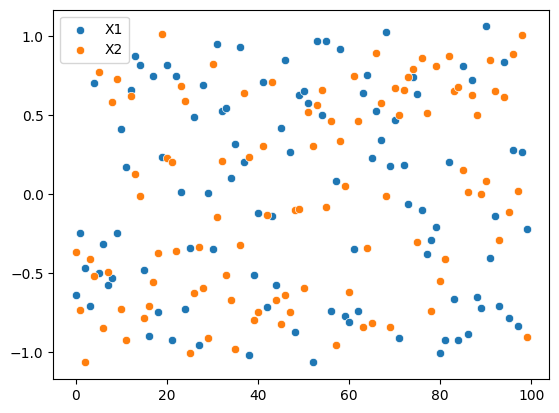

In [62]:
sns.scatterplot(X[:,0])
sns.scatterplot(X[:,1])
plt.legend(['X1','X2'])
plt.show()

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


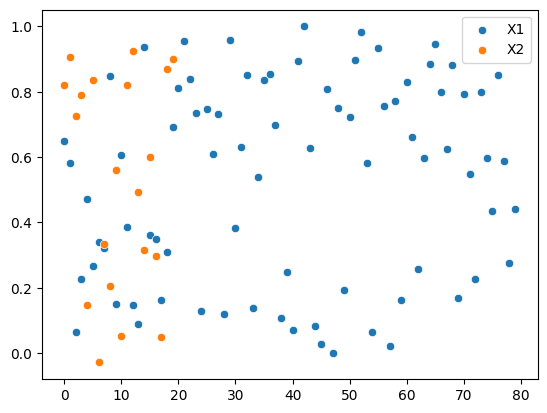

In [73]:
sns.scatterplot(X_train[:,0])
sns.scatterplot(X_test[:,1])
plt.legend(['X1','X2'])
plt.show()

In [52]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=0)

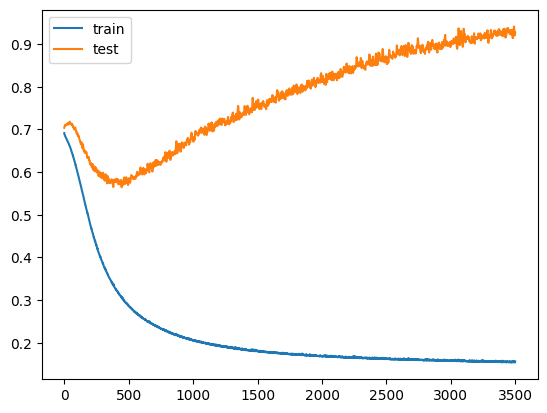

In [8]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [9]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
callback = EarlyStopping(
    monitor = "val_loss",
    min_delta = 0.001,
    patience = 100,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False
)

In [12]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3500, verbose=1, callbacks=callback)

Epoch 1/3500
3/3 [==============================] - 2s 121ms/step - loss: 0.6951 - accuracy: 0.4875 - val_loss: 0.6920 - val_accuracy: 0.5500
Epoch 2/3500
3/3 [==============================] - 0s 22ms/step - loss: 0.6901 - accuracy: 0.4875 - val_loss: 0.6968 - val_accuracy: 0.5500
Epoch 3/3500
3/3 [==============================] - 0s 47ms/step - loss: 0.6873 - accuracy: 0.4875 - val_loss: 0.7085 - val_accuracy: 0.5500
Epoch 4/3500
3/3 [==============================] - 0s 32ms/step - loss: 0.6840 - accuracy: 0.5125 - val_loss: 0.7168 - val_accuracy: 0.4000
Epoch 5/3500
3/3 [==============================] - 0s 44ms/step - loss: 0.6764 - accuracy: 0.5750 - val_loss: 0.7107 - val_accuracy: 0.4500
Epoch 6/3500
3/3 [==============================] - 0s 56ms/step - loss: 0.6777 - accuracy: 0.5875 - val_loss: 0.7087 - val_accuracy: 0.4500
Epoch 7/3500
3/3 [==============================] - 0s 29ms/step - loss: 0.6716 - accuracy: 0.6125 - val_loss: 0.7101 - val_accuracy: 0.4500
Epoch 8/3500

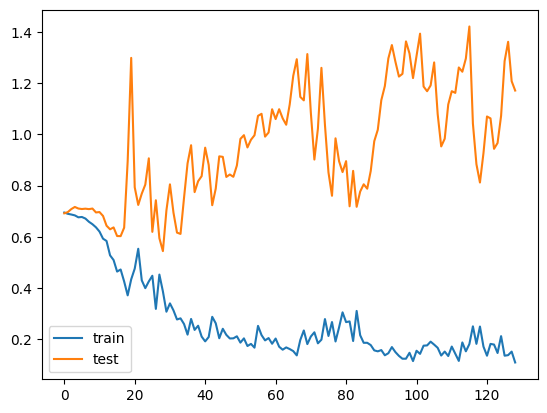

In [13]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()